<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [1]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.9 MB/s eta 0:00:00


In [2]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/MIR/Assignment 2/arxiv_data.csv')
df.drop_duplicates()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
...,...,...,...
51767,A Ray-based Approach for Boundary Estimation o...,Diffusion Tensor Imaging (DTI) is a non-invasi...,['cs.CV']
51768,Statistical Denoising for single molecule fluo...,Single molecule fluorescence microscopy is a p...,['cs.CV']
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"


In [5]:
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [6]:
df = df.sample(n = len(df) // 3)
len(df)

17258

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [7]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['summaries'] + df['titles'])
y = [eval(lst)[0] for lst in df['terms']]

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [11]:
def softmax(X):
  # Stable implementation of softmax
  X = X - np.min(X, axis = 1, keepdims = True)
  X = np.exp(X)
  probs = X / np.sum(X, axis = 1, keepdims = True)
  return probs

In [12]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, X, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''

        self.prior = np.bincount(y) / len(y)
        
        # calculate word counts for each class
        self.word_counts = np.zeros((3, X.shape[1]))
        for i in range(3):
            self.word_counts[i] = X[y == i].sum(axis=0)
        
        # apply Laplace smoothing to word counts
        self.word_counts += self.alpha
        
        # calculate log likelihoods
        self.lk_word = np.log(self.word_counts / np.sum(self.word_counts, axis=1, keepdims=True))
        
        return self

    def predict(self, X):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        log_probs = np.dot(X, self.lk_word.T) + np.log(self.prior)
        # predict the class with the highest probability

        return np.argmax(log_probs, axis=1), softmax(log_probs)

In [13]:
# use your classifier to fit on the training data
# then try to predict classes of test data

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)

classifier = NaiveBayes()
classifier = classifier.fit(X_train.toarray(), le.transform(y_train))

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred, probs = classifier.predict(X_test.toarray())
y_true = le.transform(y_test)

F1_macro = f1_score(y_true, y_pred, average = 'macro')
F1_micro = f1_score(y_true, y_pred, average = 'micro')

acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average = 'micro')
precision = precision_score(y_true, y_pred, average = 'micro')

print(f'Accuracy = {acc} \n recall = {recall} \n precision = {precision} \
\n F1 macro = {F1_macro} \n F1 micro = {F1_micro}')

Accuracy = 0.8764044943820225 
 recall = 0.8764044943820225 
 precision = 0.8764044943820225 
 F1 macro = 0.6660923850440725 
 F1 micro = 0.8764044943820225


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

roc_auc_score(y_true, probs, multi_class='ovr')

0.9346982358400736

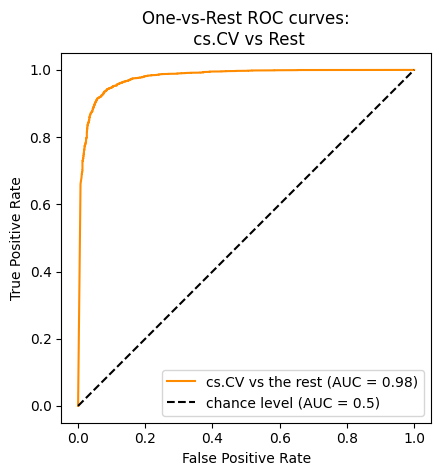

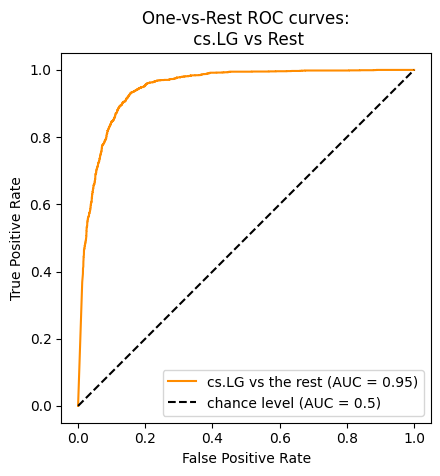

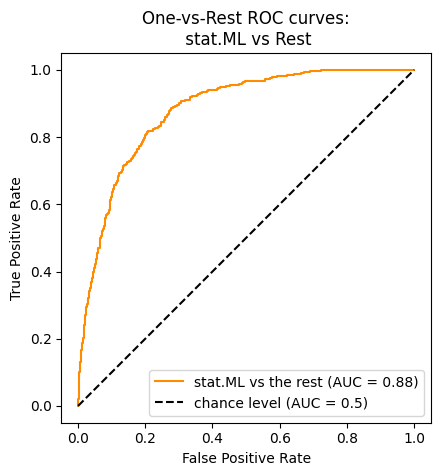

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

for i in range(3):

  class_id = i
  class_of_interest = le.classes_[i]

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      probs[:, class_id],
      name=f"{class_of_interest} vs the rest",
      color="darkorange",
  )
  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"One-vs-Rest ROC curves:\n {class_of_interest} vs Rest")
  plt.legend()
  plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

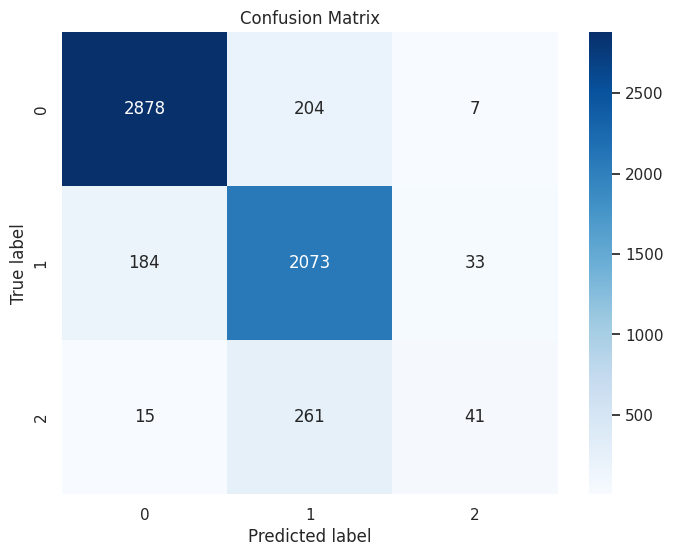

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

num_classes = len(np.unique(y_true))

# Compute the confusion 
confusion_matrix = np.bincount(np.ravel_multi_index((y_true, y_pred), (num_classes, num_classes)), minlength=num_classes**2).reshape(num_classes, num_classes)

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [18]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393383 sha256=b07c5d73fc7dc122252197caa18da3cd71df24719609ab2aca7887ad8b84cee1
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [19]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [20]:
print(df.isna().sum())
df.isna()

titles       0
summaries    0
terms        0
dtype: int64


,titles,summaries,terms
34918,False,False,False
33034,False,False,False
24560,False,False,False
11218,False,False,False
20883,False,False,False
...,...,...,...
30940,False,False,False
50412,False,False,False
28383,False,False,False
11951,False,False,False


In [21]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    if lower_case:
      text = text.lower()
      # remove extra whitespace
      text = " ".join(text.split())
    if punctuation_removal:
      text = text.translate (str.maketrans ('', '', string.punctuation))

    # I'm not gonna remove stop words since it barely improves performance.
      
    # todo
    normalized_tokens = word_tokenize(text)
    return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']

In [24]:
df['preprocessed_total'] = preprocessed_total

In [25]:
sentences = [' '.join(i) for i in df['preprocessed_total']]
df.head()

,titles,summaries,terms,preprocessed_abstract,preprocessed_title,preprocessed_total
34918,InfoRL: Interpretable Reinforcement Learning u...,Recent advances in reinforcement learning have...,"['cs.LG', 'cs.AI', 'stat.ML']","[recent, advances, in, reinforcement, learning...","[inforl, interpretable, reinforcement, learnin...","[recent, advances, in, reinforcement, learning..."
33034,A Deep Q-Network for the Beer Game: A Deep Rei...,The beer game is a widely used in-class game t...,"['cs.LG', 'cs.MA']","[the, beer, game, is, a, widely, used, inclass...","[a, deep, qnetwork, for, the, beer, game, a, d...","[the, beer, game, is, a, widely, used, inclass..."
24560,ReLaText: Exploiting Visual Relationships for ...,We introduce a new arbitrary-shaped text detec...,['cs.CV'],"[we, introduce, a, new, arbitraryshaped, text,...","[relatext, exploiting, visual, relationships, ...","[we, introduce, a, new, arbitraryshaped, text,..."
11218,Deep Learning Image Recognition for Non-images,Powerful deep learning algorithms open an oppo...,"['cs.LG', 'cs.CV']","[powerful, deep, learning, algorithms, open, a...","[deep, learning, image, recognition, for, noni...","[powerful, deep, learning, algorithms, open, a..."
20883,Joint Graph Learning and Matching for Semantic...,"In recent years, powered by the learned discri...",['cs.CV'],"[in, recent, years, powered, by, the, learned,...","[joint, graph, learning, and, matching, for, s...","[in, recent, years, powered, by, the, learned,..."


In [26]:
X_train, X_test, y_train, y_test = train_test_split(sentences,y , test_size=0.33, random_state=42)

In [27]:
X_train[0]

'graph convolutional networks gcns have been successfully applied to analyze nongrid data where the classical convolutional neural networks cnns can not be directly used one similarity shared by gcns and cnns is the requirement of massive amount of labeled data for network training in addition gcns need the adjacency matrix as input to define the relationship between those nongrid data which leads to all of data including training validation and test data typically forms only one graph structures data for training furthermore the adjacency matrix is usually predefined and stationary which makes the data augmentation strategies can not be employed on the constructed graph structures data to augment the amount of training data to further improve the learning capacity and model performance under the limited training data in this paper we propose two types of selfsupervised learning strategies to exploit available information from the input graph structure data itself our proposed selfsupe

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [28]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        sg = 1 if self.method == 'skipgram' else 0
        self.model = fasttext.train_unsupervised("train.txt", model = self.method)
        self.save_FastText_model()

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get 
        the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        # todo
        query_embed = None
        text = query
        if query is not None:
          query = self.preprocessor(query)


        vocab = tf_idf_vectorizer.vocabulary_
        word_indices = [vocab.get(word, -1) for word in query]

        # Filter out any words that were not found in the vocabulary
        word_indices = [idx for idx in word_indices if idx != -1]
        tf_idf_scores = tf_idf_vectorizer.transform([text]).toarray()[0][word_indices]
        tf_idf_dict = {word: score for word, score in zip(query, tf_idf_scores)}

        query_embed = np.zeros(100)
        for word in tf_idf_dict.keys():
          query_embed += self.model[word] * tf_idf_dict[word]
        return query_embed

    def save_FastText_model(self, path='/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path='/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'):
        self.model = fasttext.load_model(path)

    def writeToFile(self, dataset):
        import os.path

        if os.path.isfile('train.txt'):
            print('File already exists.')
            return
        
        with open('train.txt', 'w') as f:
            for doc in dataset:
                f.write(' '.join(doc) + '\n')

    def prepare(self, dataset, mode, save=False):
        self.writeToFile(dataset)
        if mode == 'train':
            self.train()
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [29]:
PATH = '/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'

FastText_model = FastText(preprocessor=preprocess_text)
if os.path.isfile('/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'):
  FastText_model.load_FastText_model(path = PATH)
else:
  FastText_model.prepare(sentences, mode='train', save=True)

In [30]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.8816801905632019, 'covid19'),
 (0.7332700490951538, 'pneumonia'),
 (0.7214226722717285, 'coronavirus'),
 (0.7205132842063904, 'inhospital'),
 (0.7194042205810547, 'leukemia'),
 (0.7165623307228088, 't2d'),
 (0.7163155674934387, 'prauc'),
 (0.7056013345718384, 'uk'),
 (0.7011128664016724, 'pandemic'),
 (0.6984890103340149, 'demographic')]

In [31]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit_transform(data)

In [32]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(sentences)

In [33]:
text =  "backpropagation is good"

FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(preprocessed_total, mode='load')
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 0.12535696,  0.18673018,  0.33569588, -0.3197509 ,  0.80907011,
       -0.31786563,  0.14130888,  0.01444224, -0.45206279,  0.07178922,
       -0.05500232,  0.09595362, -1.09737686,  0.55506898,  0.38096863,
       -0.27217036,  0.48575258,  0.07636361, -0.19165251, -0.21898759,
        0.36434969,  0.0503412 ,  0.06971476, -0.500687  ,  0.21837029,
       -0.45554448,  0.29326485,  0.0168828 ,  0.02413969,  0.61649828,
       -0.20948436,  0.34548225,  0.09345377,  0.30486353, -0.14598792,
       -0.0267101 , -0.35052959, -0.14744686,  0.40703693, -0.04738032,
       -0.23817235,  0.06095832,  0.10733592, -0.04623644,  0.5375176 ,
       -0.41572737,  0.14255052,  0.49342104,  0.26842503,  0.09313415,
       -0.0918692 ,  0.09343506, -0.33134706,  0.33742084,  0.17445253,
       -0.0768018 , -0.20034233,  0.43492707,  0.33921057,  0.4512807 ,
        0.12326456,  0.14007432,  0.27269872,  0.44467663,  0.4786933 ,
        0.28264768,  0.42575999, -0.1286667 ,  0.36855221,  0.39


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [34]:
# todo
embeddings = []
for sentence in sentences:
  sentence_embed = FastText_model.get_query_embedding(sentence, TF_IDF_model.vectorizer)
  embeddings.append(sentence_embed)

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [35]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = np.array(embeddings)
        self.labels = np.array(labels)
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, i):
        return self.embeddings[i], self.labels[i]

In [36]:
# todo calculate the labels
labels = le.transform(y)

In [37]:
from torch.utils.data import random_split

dataset = PapersDataSet(embeddings, labels)


train_size = int(len(dataset) * 0.8)
val_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size - val_size

# Use random_split to split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create dataloaders for the train, validation, and test sets
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super(ClassifierModel, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [40]:
import torch.optim as optim

# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    if test_mode:
        mode = "Test"
    else:
        mode = "Validation"
    print(f"Evaluating on {mode} set...")

    model.eval()
    eval_loss = 0.0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(torch.float32)
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            eval_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, dim=1)
            predicted_labels.extend(preds.tolist())
            true_labels.extend(labels.tolist())

    f1_score_macro = f1_score(true_labels, predicted_labels, average="macro")

    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [42]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores_val = []
f1_macro_scores_train = []
best_val_loss = float('inf')

for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    predicted_labels = []
    true_labels = []

    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            optimizer.zero_grad()
            x = x.to(device)
            label = label.to(device)
            x = x.to(torch.float32)
            y_pred = model(x)
            loss = criterion(y_pred, label)
            loss.backward()
            _, preds = torch.max(y_pred, dim=1)
            optimizer.step()
            train_loss += loss.item() * x.size(0)

            predicted_labels.extend(preds.tolist())
            true_labels.extend(label.tolist())
  
    model.eval()
    
    f1_score_macro_train = f1_score(true_labels, predicted_labels, average="macro")
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores_val.append(f1_score_macro)
    f1_macro_scores_train.append(f1_score_macro_train)
    
    end_time = time()

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

100%|██████████| 108/108 [00:03<00:00, 27.11it/s]


Evaluating on Validation set...
Epoch 1 finished in 4.06s
[Epoch 1]	Train Loss: 0.6516	Validation Loss: 0.4635	 F1 score macro: 0.5721868676151561


100%|██████████| 108/108 [00:00<00:00, 255.88it/s]


Evaluating on Validation set...
Epoch 2 finished in 0.49s
[Epoch 2]	Train Loss: 0.4547	Validation Loss: 0.3958	 F1 score macro: 0.5800274334839943


100%|██████████| 108/108 [00:00<00:00, 262.72it/s]


Evaluating on Validation set...
Epoch 3 finished in 0.48s
[Epoch 3]	Train Loss: 0.4311	Validation Loss: 0.3828	 F1 score macro: 0.5805668095005195


100%|██████████| 108/108 [00:00<00:00, 242.49it/s]


Evaluating on Validation set...
Epoch 4 finished in 0.51s
[Epoch 4]	Train Loss: 0.4185	Validation Loss: 0.3795	 F1 score macro: 0.5780423642561375


100%|██████████| 108/108 [00:00<00:00, 259.67it/s]


Evaluating on Validation set...
Epoch 5 finished in 0.49s
[Epoch 5]	Train Loss: 0.4042	Validation Loss: 0.3686	 F1 score macro: 0.5821541455687798


100%|██████████| 108/108 [00:00<00:00, 266.12it/s]


Evaluating on Validation set...
Epoch 6 finished in 0.46s
[Epoch 6]	Train Loss: 0.4051	Validation Loss: 0.3735	 F1 score macro: 0.5812690832957491


100%|██████████| 108/108 [00:00<00:00, 366.20it/s]


Evaluating on Validation set...
Epoch 7 finished in 0.34s
[Epoch 7]	Train Loss: 0.3966	Validation Loss: 0.3826	 F1 score macro: 0.5765800659875477


100%|██████████| 108/108 [00:00<00:00, 366.96it/s]


Evaluating on Validation set...
Epoch 8 finished in 0.34s
[Epoch 8]	Train Loss: 0.3920	Validation Loss: 0.3646	 F1 score macro: 0.5846840977530693


100%|██████████| 108/108 [00:00<00:00, 358.20it/s]


Evaluating on Validation set...
Epoch 9 finished in 0.35s
[Epoch 9]	Train Loss: 0.3925	Validation Loss: 0.3699	 F1 score macro: 0.5844795792473206


100%|██████████| 108/108 [00:00<00:00, 358.98it/s]


Evaluating on Validation set...
Epoch 10 finished in 0.35s
[Epoch 10]	Train Loss: 0.3857	Validation Loss: 0.3641	 F1 score macro: 0.5843407899272482


100%|██████████| 108/108 [00:00<00:00, 357.26it/s]


Evaluating on Validation set...
Epoch 11 finished in 0.35s
[Epoch 11]	Train Loss: 0.3779	Validation Loss: 0.3630	 F1 score macro: 0.5823852413397604


100%|██████████| 108/108 [00:00<00:00, 347.06it/s]


Evaluating on Validation set...
Epoch 12 finished in 0.36s
[Epoch 12]	Train Loss: 0.3773	Validation Loss: 0.3655	 F1 score macro: 0.5825997992433016


100%|██████████| 108/108 [00:00<00:00, 372.75it/s]


Evaluating on Validation set...
Epoch 13 finished in 0.34s
[Epoch 13]	Train Loss: 0.3741	Validation Loss: 0.3672	 F1 score macro: 0.5821541455687798


100%|██████████| 108/108 [00:00<00:00, 372.80it/s]


Evaluating on Validation set...
Epoch 14 finished in 0.34s
[Epoch 14]	Train Loss: 0.3686	Validation Loss: 0.3668	 F1 score macro: 0.5831715845040296


100%|██████████| 108/108 [00:00<00:00, 364.20it/s]


Evaluating on Validation set...
Epoch 15 finished in 0.34s
[Epoch 15]	Train Loss: 0.3664	Validation Loss: 0.3697	 F1 score macro: 0.583168829774641


100%|██████████| 108/108 [00:00<00:00, 365.99it/s]


Evaluating on Validation set...
Epoch 16 finished in 0.35s
[Epoch 16]	Train Loss: 0.3654	Validation Loss: 0.3679	 F1 score macro: 0.5846946358356481


100%|██████████| 108/108 [00:00<00:00, 361.88it/s]


Evaluating on Validation set...
Epoch 17 finished in 0.35s
[Epoch 17]	Train Loss: 0.3629	Validation Loss: 0.3627	 F1 score macro: 0.5832078089087992


100%|██████████| 108/108 [00:00<00:00, 362.65it/s]


Evaluating on Validation set...
Epoch 18 finished in 0.35s
[Epoch 18]	Train Loss: 0.3631	Validation Loss: 0.3681	 F1 score macro: 0.5820123106267321


100%|██████████| 108/108 [00:00<00:00, 366.22it/s]


Evaluating on Validation set...
Epoch 19 finished in 0.35s
[Epoch 19]	Train Loss: 0.3570	Validation Loss: 0.3783	 F1 score macro: 0.577726048265649


100%|██████████| 108/108 [00:00<00:00, 365.25it/s]


Evaluating on Validation set...
Epoch 20 finished in 0.34s
[Epoch 20]	Train Loss: 0.3619	Validation Loss: 0.3595	 F1 score macro: 0.5840590375582599


100%|██████████| 108/108 [00:00<00:00, 349.13it/s]


Evaluating on Validation set...
Epoch 21 finished in 0.36s
[Epoch 21]	Train Loss: 0.3574	Validation Loss: 0.3700	 F1 score macro: 0.5830323220557249


100%|██████████| 108/108 [00:00<00:00, 359.73it/s]


Evaluating on Validation set...
Epoch 22 finished in 0.35s
[Epoch 22]	Train Loss: 0.3581	Validation Loss: 0.3632	 F1 score macro: 0.5861260529739002


100%|██████████| 108/108 [00:00<00:00, 368.60it/s]


Evaluating on Validation set...
Epoch 23 finished in 0.34s
[Epoch 23]	Train Loss: 0.3532	Validation Loss: 0.3626	 F1 score macro: 0.5836779066182234


100%|██████████| 108/108 [00:00<00:00, 350.38it/s]


Evaluating on Validation set...
Epoch 24 finished in 0.36s
[Epoch 24]	Train Loss: 0.3500	Validation Loss: 0.3724	 F1 score macro: 0.5836544579907863


100%|██████████| 108/108 [00:00<00:00, 362.49it/s]


Evaluating on Validation set...
Epoch 25 finished in 0.35s
[Epoch 25]	Train Loss: 0.3481	Validation Loss: 0.3738	 F1 score macro: 0.5802134918014747


100%|██████████| 108/108 [00:00<00:00, 346.31it/s]


Evaluating on Validation set...
Epoch 26 finished in 0.36s
[Epoch 26]	Train Loss: 0.3504	Validation Loss: 0.4215	 F1 score macro: 0.5639480399396283


100%|██████████| 108/108 [00:00<00:00, 344.11it/s]


Evaluating on Validation set...
Epoch 27 finished in 0.36s
[Epoch 27]	Train Loss: 0.3446	Validation Loss: 0.3668	 F1 score macro: 0.586280209963908


100%|██████████| 108/108 [00:00<00:00, 347.09it/s]


Evaluating on Validation set...
Epoch 28 finished in 0.36s
[Epoch 28]	Train Loss: 0.3436	Validation Loss: 0.3721	 F1 score macro: 0.5838507266469756


100%|██████████| 108/108 [00:00<00:00, 364.45it/s]


Evaluating on Validation set...
Epoch 29 finished in 0.36s
[Epoch 29]	Train Loss: 0.3421	Validation Loss: 0.3754	 F1 score macro: 0.585319232083943


100%|██████████| 108/108 [00:00<00:00, 359.85it/s]


Evaluating on Validation set...
Epoch 30 finished in 0.35s
[Epoch 30]	Train Loss: 0.3434	Validation Loss: 0.3635	 F1 score macro: 0.5888421580812363


100%|██████████| 108/108 [00:00<00:00, 353.42it/s]


Evaluating on Validation set...
Epoch 31 finished in 0.35s
[Epoch 31]	Train Loss: 0.3344	Validation Loss: 0.3708	 F1 score macro: 0.5822487872891592


100%|██████████| 108/108 [00:00<00:00, 348.10it/s]


Evaluating on Validation set...
Epoch 32 finished in 0.36s
[Epoch 32]	Train Loss: 0.3343	Validation Loss: 0.3771	 F1 score macro: 0.5831777569856091


100%|██████████| 108/108 [00:00<00:00, 373.38it/s]


Evaluating on Validation set...
Epoch 33 finished in 0.34s
[Epoch 33]	Train Loss: 0.3344	Validation Loss: 0.3670	 F1 score macro: 0.5854123844572722


100%|██████████| 108/108 [00:00<00:00, 361.49it/s]


Evaluating on Validation set...
Epoch 34 finished in 0.35s
[Epoch 34]	Train Loss: 0.3346	Validation Loss: 0.3742	 F1 score macro: 0.5819793446030533


100%|██████████| 108/108 [00:00<00:00, 282.44it/s]


Evaluating on Validation set...
Epoch 35 finished in 0.45s
[Epoch 35]	Train Loss: 0.3387	Validation Loss: 0.3844	 F1 score macro: 0.5812084216796082


100%|██████████| 108/108 [00:00<00:00, 270.69it/s]


Evaluating on Validation set...
Epoch 36 finished in 0.47s
[Epoch 36]	Train Loss: 0.3296	Validation Loss: 0.3722	 F1 score macro: 0.5844677119013402


100%|██████████| 108/108 [00:00<00:00, 263.21it/s]


Evaluating on Validation set...
Epoch 37 finished in 0.48s
[Epoch 37]	Train Loss: 0.3274	Validation Loss: 0.3755	 F1 score macro: 0.5863884507718607


100%|██████████| 108/108 [00:00<00:00, 251.80it/s]


Evaluating on Validation set...
Epoch 38 finished in 0.50s
[Epoch 38]	Train Loss: 0.3231	Validation Loss: 0.3716	 F1 score macro: 0.587929600239277


100%|██████████| 108/108 [00:00<00:00, 252.82it/s]


Evaluating on Validation set...
Epoch 39 finished in 0.50s
[Epoch 39]	Train Loss: 0.3249	Validation Loss: 0.3691	 F1 score macro: 0.5861580053346821


100%|██████████| 108/108 [00:00<00:00, 247.61it/s]


Evaluating on Validation set...
Epoch 40 finished in 0.50s
[Epoch 40]	Train Loss: 0.3269	Validation Loss: 0.3629	 F1 score macro: 0.5874022955194503


100%|██████████| 108/108 [00:01<00:00, 69.11it/s]


Evaluating on Validation set...
Epoch 41 finished in 1.74s
[Epoch 41]	Train Loss: 0.3204	Validation Loss: 0.3825	 F1 score macro: 0.5844198401413444


100%|██████████| 108/108 [00:00<00:00, 203.41it/s]


Evaluating on Validation set...
Epoch 42 finished in 0.77s
[Epoch 42]	Train Loss: 0.3229	Validation Loss: 0.3782	 F1 score macro: 0.5838413592189701


100%|██████████| 108/108 [00:01<00:00, 106.22it/s]


Evaluating on Validation set...
Epoch 43 finished in 1.08s
[Epoch 43]	Train Loss: 0.3199	Validation Loss: 0.3703	 F1 score macro: 0.5854123844572722


100%|██████████| 108/108 [00:00<00:00, 349.67it/s]


Evaluating on Validation set...
Epoch 44 finished in 0.41s
[Epoch 44]	Train Loss: 0.3139	Validation Loss: 0.3701	 F1 score macro: 0.5878917935653215


100%|██████████| 108/108 [00:01<00:00, 105.52it/s]


Evaluating on Validation set...
Epoch 45 finished in 1.07s
[Epoch 45]	Train Loss: 0.3175	Validation Loss: 0.3735	 F1 score macro: 0.5872080950362096


100%|██████████| 108/108 [00:00<00:00, 365.33it/s]


Evaluating on Validation set...
Epoch 46 finished in 0.34s
[Epoch 46]	Train Loss: 0.3114	Validation Loss: 0.3792	 F1 score macro: 0.587449923252269


100%|██████████| 108/108 [00:00<00:00, 335.77it/s]


Evaluating on Validation set...
Epoch 47 finished in 0.37s
[Epoch 47]	Train Loss: 0.3137	Validation Loss: 0.3707	 F1 score macro: 0.590849741084615


100%|██████████| 108/108 [00:00<00:00, 374.36it/s]


Evaluating on Validation set...
Epoch 48 finished in 0.34s
[Epoch 48]	Train Loss: 0.3213	Validation Loss: 0.3778	 F1 score macro: 0.5857545941841867


100%|██████████| 108/108 [00:00<00:00, 363.45it/s]


Evaluating on Validation set...
Epoch 49 finished in 0.34s
[Epoch 49]	Train Loss: 0.3166	Validation Loss: 0.3739	 F1 score macro: 0.5824150330588099


100%|██████████| 108/108 [00:00<00:00, 353.60it/s]

Evaluating on Validation set...
Epoch 50 finished in 0.35s
[Epoch 50]	Train Loss: 0.3086	Validation Loss: 0.3726	 F1 score macro: 0.5883547565282844


In [43]:
model = ClassifierModel()
model.load_state_dict(torch.load("best_model.pth"))
model = model.to(device)

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

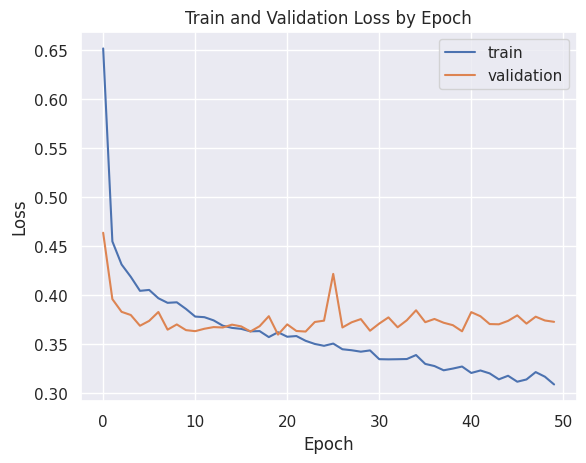

In [44]:
plt.plot(train_loss_arr, label='train')
plt.plot(val_loss_arr, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss by Epoch')
plt.legend()
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

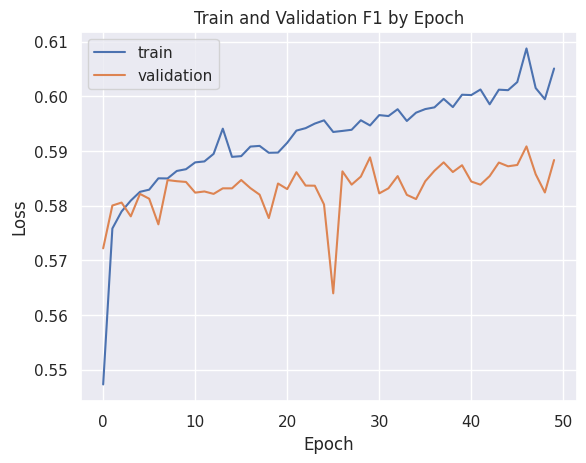

In [45]:
plt.plot(f1_macro_scores_train, label='train')
plt.plot(f1_macro_scores_val, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation F1 by Epoch')
plt.legend()
plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

Evaluating on Test set...
Accuracy: 0.8547
Loss: 0.3859
F1-Macro: 0.5837
F1-Micro: 0.8547


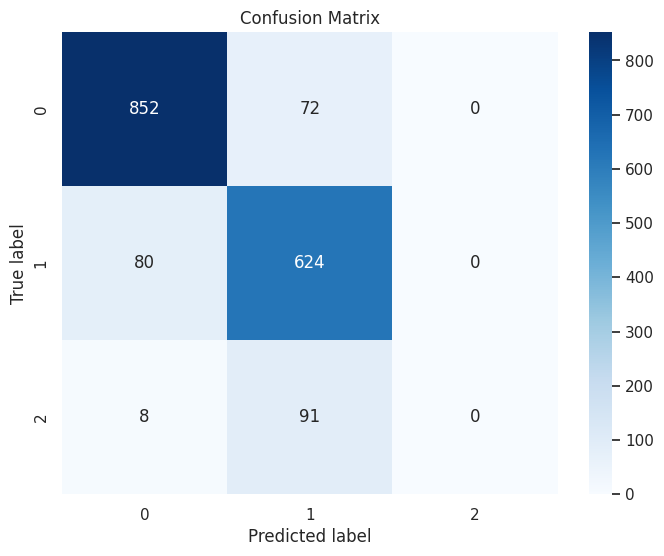

Macro-average precision: 0.5664
Macro-average recall: 0.6028
Micro-average precision: 0.8547
Micro-average recall: 0.8547


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# todo: evaluate the model on the test set
# print the required metrics
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
np.set_printoptions(suppress=True)

model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Loss
print(f"Loss: {eval_loss / len(test_loader.dataset):.4f}")

# F1-Macro
print(f"F1-Macro: {f1_score_macro:.4f}")

# F1-Micro
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
print(f"F1-Micro: {f1_score_micro:.4f}")

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot the confusion matrix using seaborn
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Macro-average precision and recall
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
print(f"Macro-average precision: {precision_macro:.4f}")
print(f"Macro-average recall: {recall_macro:.4f}")

# Micro-average precision and recall
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')
print(f"Micro-average precision: {precision_micro:.4f}")
print(f"Micro-average recall: {recall_micro:.4f}")

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [47]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    embed = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    predicted_class = model(torch.Tensor(embed).unsqueeze(0).to(device))
    _, preds = torch.max(predicted_class, dim=1)
    return le.classes_[preds[0].item()]

In [48]:
predict('Super resolution is the task of maintaining the original quality of the image, while also increasing its resolution.')

'cs.CV'

In [49]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [ ]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [ ]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test


random_state = 1
X_train, X_test, y_train, y_test = [None] * 4

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [ ]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# todo 
from transformers import BertTokenizer, BertForSequenceClassification

# you can add more cells here if you need
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

tokenizer =  BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# todo
train_encodings = None
test_encodings = None

train_encodings, test_encodings, y_train, y_test = train_test_split(sentences,le.transform(y) , test_size=0.2, random_state=42)

In [ ]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        text = self.encodings[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt', padding='max_length', truncation=True, max_length=256)
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': torch.tensor(label)} 

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

model.to(device)

from tqdm import tqdm

losses = []

for epoch in range(3):
    model.train()
    running_loss = 0
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}')
    for batch in pbar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        pbar.set_postfix({'Loss': loss.item()})
    
    running_loss = running_loss / len(train_loader)
    losses.append(running_loss)
    print(f'Training Loss: {loss.item():.4f}')

Epoch 1: 100%|██████████| 863/863 [10:36<00:00,  1.36it/s, Loss=0.36]


Training Loss: 0.3600


Epoch 2:  57%|█████▋    | 491/863 [06:00<04:29,  1.38it/s, Loss=0.205]

In [ ]:
model.eval()
val_loss = 0
val_acc = 0
with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}')
      for batch in pbar:
    # for batch in tqdm(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        val_loss += outputs.loss.item()
        val_acc += (outputs.logits.argmax(dim=1) == labels).sum().item()

val_loss /= len(val_loader)
val_acc /= len(val_loader.dataset)

losses.append(val_loss)
print(f'Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}')

Epoch 1: 100%|██████████| 216/216 [01:08<00:00,  3.15it/s]

Validation Loss: 0.8647 | Validation Accuracy: 0.5443


In [ ]:
# todo
# fine tune bert and train model
training_args = None

trainer = None

trainer.train()

In [ ]:
model_2 = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

for name, param in model_2.named_parameters():
    if name.startswith('bert'):
        param.requires_grad = False

model_2.classifier = nn.Sequential(
    nn.Linear(model.config.hidden_size, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

model_2 = model_2.to(device)

losses = []

for epoch in range(3):
    model_2.train()
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}')
    for batch in pbar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        pbar.set_postfix({'Loss': loss.item()})
    
    losses.append(loss.item())
    print(f'Training Loss: {loss.item():.4f}')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Training Loss: 1.0042


Epoch 2: 100%|██████████| 648/648 [03:26<00:00,  3.15it/s, Loss=1.08]


Training Loss: 1.0820


Epoch 3: 100%|██████████| 648/648 [03:18<00:00,  3.26it/s, Loss=1.09]

Training Loss: 1.0890


In [ ]:
model.eval()
val_loss = 0
val_acc = 0
with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}')
      for batch in pbar:
    # for batch in tqdm(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        val_loss += outputs.loss.item()
        val_acc += (outputs.logits.argmax(dim=1) == labels).sum().item()

val_loss /= len(val_loader)
val_acc /= len(val_loader.dataset)

losses.append(val_loss)
print(f'Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}')

Epoch 3: 100%|██████████| 162/162 [00:48<00:00,  3.33it/s]

Validation Loss: 1.0475 | Validation Accuracy: 0.5465


In [ ]:
def save(PATH, model):
    torch.save(model.state_dict(), PATH)

def load_weights(PATH, model):
    model.load_state_dict(torch.load(PATH))
    return model

PATH = "/content/drive/MyDrive/MIR/Assignment 2/BERT_fine_tune.pt"
save(PATH, model)


## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# you can add more cells here if you need
# todo
y_pred_transformers = []
y_pred_transformers_2 = []

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    predicted_class = None
    return predicted_class

In [ ]:
predict('hardware is very good.', model)

In [ ]:
# It is highly recommended to save your final models
# todo

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [ ]:
def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',\
           weight: float = 0.5, print=False, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    # TODO: retun top 'max_result_count' documents for your searched query

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [ ]:
from transformers import BertTokenizer

A = BertTokenizer.from_pretrained('bert-base-uncased')

B = ['This is the first sentence.', 'This is the second sentence.']

# Encoding the sentences with [CLS] token added to the beginning of each sentence
C = A(B, add_special_tokens=True)

# Print the encoded inputs
print(C)


{'input_ids': [[101, 2023, 2003, 1996, 2034, 6251, 1012, 102], [101, 2023, 2003, 1996, 2117, 6251, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


In [50]:
len(sentences)

17258

In [51]:
## ؟ points

from typing import List
from transformers import BertTokenizer, BertModel


class EmbeddingExtractor:
  def __init__(self):
    self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    self.model = BertModel.from_pretrained('bert-base-uncased')


  def get_embedding(self, doc):
    tokens = self.tokenizer.tokenize(doc)
    tokens = ['[CLS]'] + tokens + ['[SEP]']

    input_ids = self.tokenizer.convert_tokens_to_ids(tokens)
    input_ids = torch.tensor([input_ids])

    self.model = self.model.to(device)
    input_ids = input_ids.to(device)

    with torch.no_grad():
        outputs = self.model(input_ids)

    embedding = outputs.last_hidden_state[0, -1, :].cpu().numpy()
    return embedding

  def extract_embeddings(self, documents):
    embeddings = []
    
    for doc in documents:
      embeddings.append(self.get_embedding(doc))
    
    return embeddings

extractor = EmbeddingExtractor()
docs_embedding = np.array(extractor.extract_embeddings(sentences[0:5000]))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
docs_embedding.shape

(5000, 768)

In [56]:
import pickle


with open('/content/drive/MyDrive/MIR/Assignment 2/embeddings.pickle', 'wb') as handle:
    pickle.dump(docs_embedding, handle, protocol=pickle.HIGHEST_PROTOCOL)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [57]:
## ؟ points

from typing import List
from sklearn.manifold import TSNE


def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector 

    emb_vecs = np.array(emb_vecs)

    tsne = TSNE(n_components=2)

    # Fit and transform the input vectors to 2D
    emb_vecs_2d = tsne.fit_transform(emb_vecs)

    return emb_vecs_2d
    
docs_embedding_2d = np.array(convert_to_2d_tsne(docs_embedding)) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

In [58]:
docs_embedding_2d[0]

array([-36.541004,  20.452486], dtype=float32)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


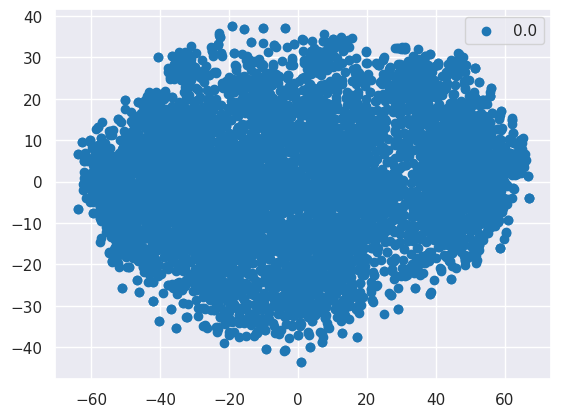

In [59]:
## ؟ points

from typing import List

def plot_docs(emb_vecs_2d: List, labels : List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    # TODO: Draw a 2d plot from input vectors and color each cluster with specific color
    
    unique_labels = np.unique(labels)

    # Define a color map
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot each cluster with a different color
    for i, label in enumerate(unique_labels):
        emb_vecs_2d_cluster = emb_vecs_2d[labels == label]
        ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)

    # Add a legend and show the plot
    ax.legend()
    plt.show()

plot_docs(docs_embedding_2d, np.zeros(5000))

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [70]:
## ؟ points

from typing import List

def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    emb_vecs = np.array(emb_vecs)
    centroids = emb_vecs[np.random.choice(emb_vecs.shape[0], n_clusters, replace=False)]

    for i in range(100):
        distances = np.sqrt(((emb_vecs - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        for j in range(n_clusters):
            centroids[j] = emb_vecs[labels == j].mean(axis=0)

    return centroids, labels

    
# cluster_centers, cluster_means = cluster_kmeans(docs_embedding, 3) # return [NUM, NUM, NUM, ...]

In [76]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [87]:
a, b = np.unique(le.transform(y)[0:5000], return_counts=True)

b

array([2727, 1990,  283])

In [85]:
def replace_cluster_labels(cluster_labels, true_labels):
    unique_clusters = np.unique(cluster_labels)

    cluster_representations = {}

    for cluster in unique_clusters:
        cluster_points = np.where(cluster_labels == cluster)[0]
        cluster_true_labels = true_labels[cluster_points]
        most_common_label = np.argmax(np.bincount(cluster_true_labels))
        cluster_representations[cluster] = most_common_label

    new_labels = np.array([cluster_representations[label] for label in cluster_labels])

    return new_labels

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


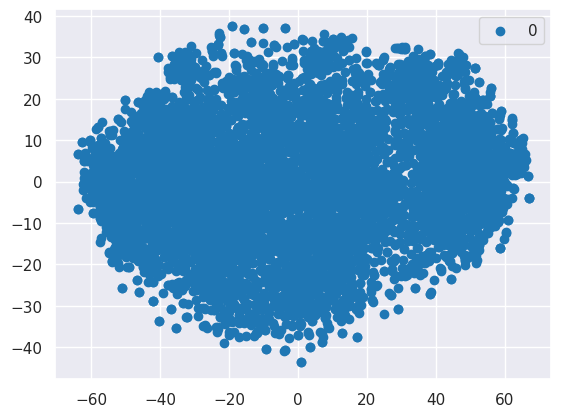

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


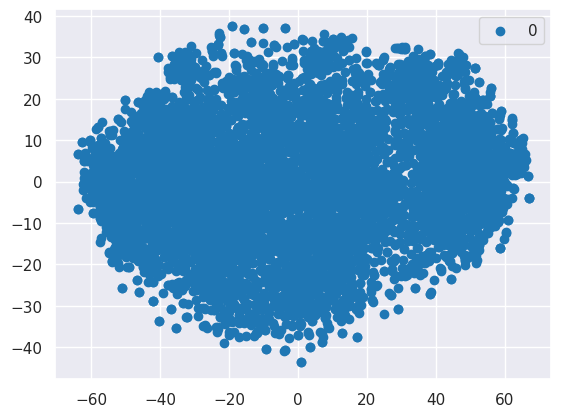

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


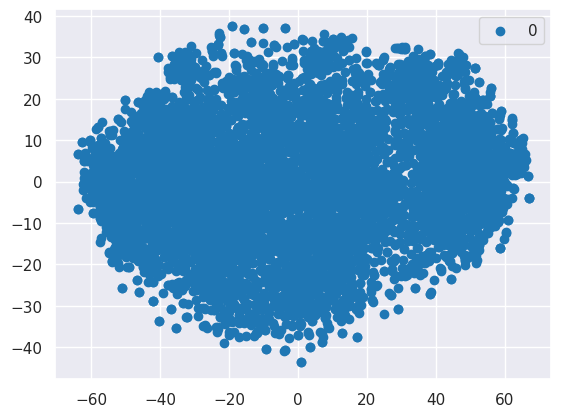

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


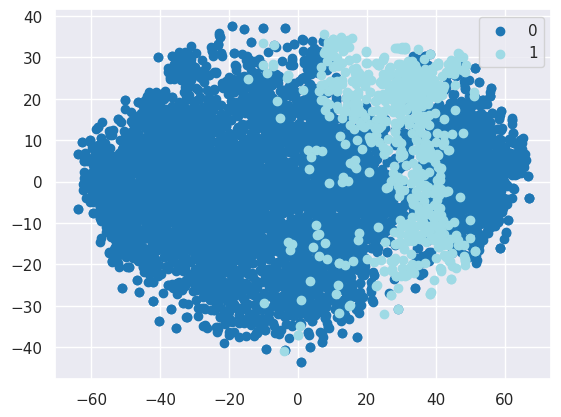

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


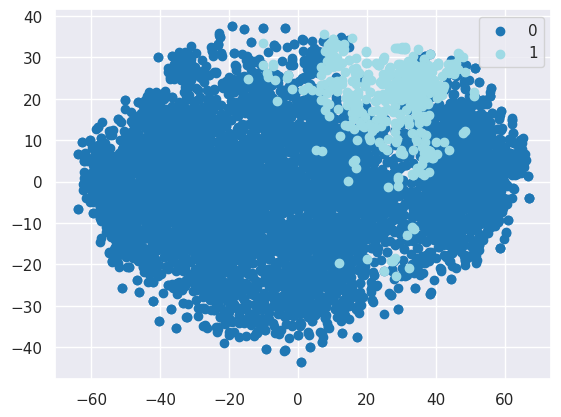

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


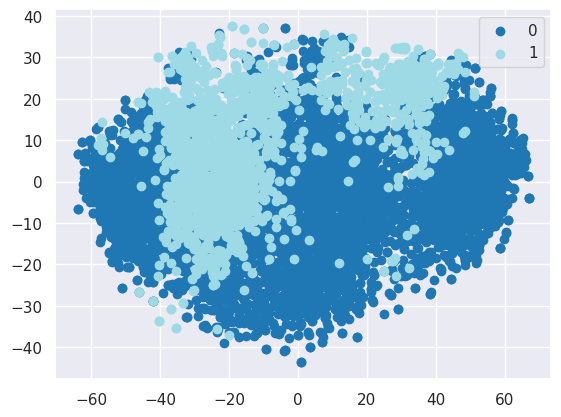

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


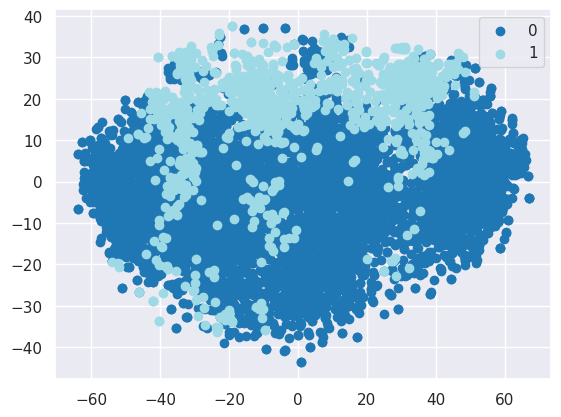

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


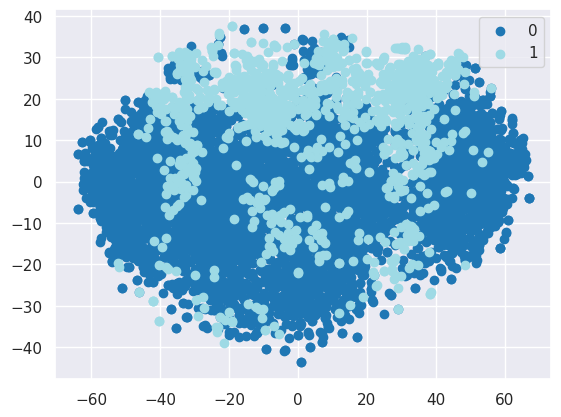

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


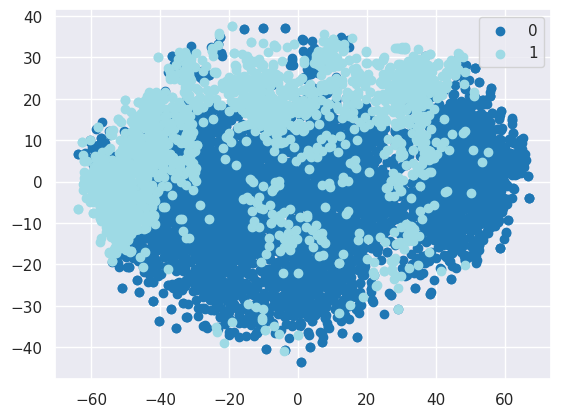

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
purity = []

true_labels = le.transform(y)[0:5000]

for k in range(2, 11):
    cluster_centers, cluster_means = cluster_kmeans(docs_embedding, k)
    silhouette_scores.append(silhouette_score(docs_embedding_2d, cluster_means))
    purity.append(purity_score(true_labels,cluster_means))
    cluster_representations = replace_cluster_labels(cluster_means, true_labels)
    plot_docs(docs_embedding_2d, cluster_representations)

<ipython-input-59-9ba3f6ea7492>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


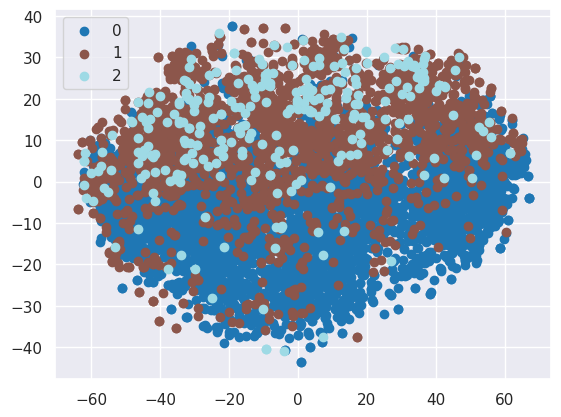

In [64]:
plot_docs(docs_embedding_2d, le.transform(y)[0:5000])

Text(0, 0.5, 'score')

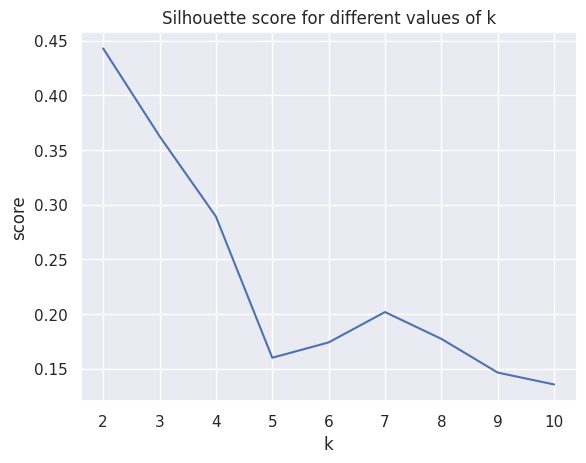

In [81]:
plt.plot(np.arange(2,11, 1),silhouette_scores)
plt.title('Silhouette score for different values of k')
plt.xlabel('k')
plt.ylabel('score')

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
#TODO: silhouette analysis 

Text(0, 0.5, 'purity')

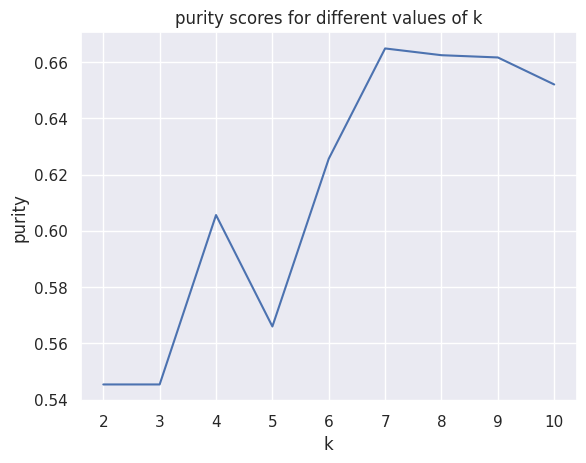

In [80]:
plt.plot(np.arange(2, 11), purity)
plt.title('purity scores for different values of k')
plt.xlabel('k')
plt.ylabel('purity')

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

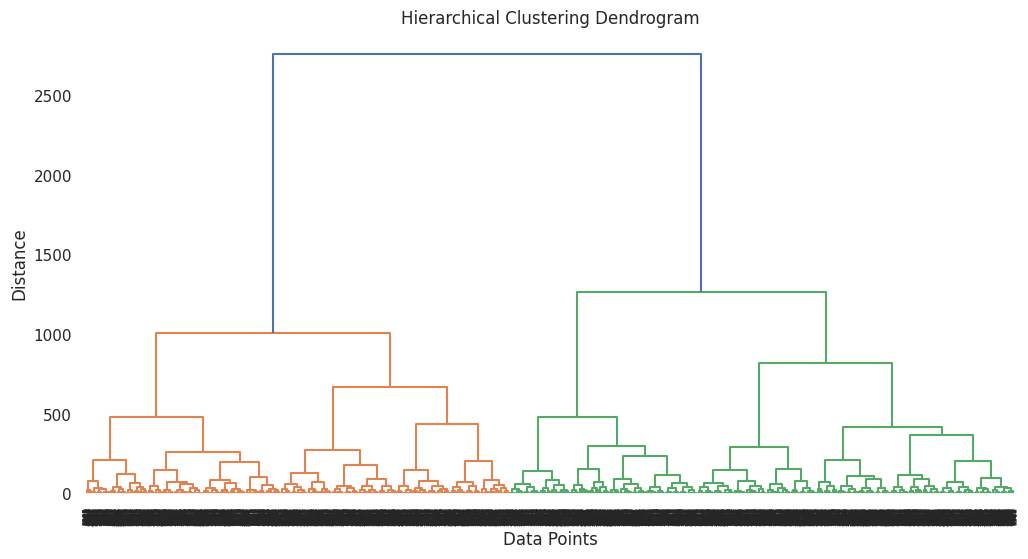

In [83]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

Z = shc.linkage(docs_embedding_2d, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dn = shc.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [ ]:
## ؟ points

from typing import List

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    # TODO: Implement a function to find similar documents to input document.
    pass

find_similar_docs(int, int, [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])